# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

In [78]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.
from statsmodels.tsa.seasonal import seasonal_decompose

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. .

plt.style.use('fivethirtyeight') # 

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'yourAPIkey'

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
#Defining path
path=r'/Users/frankamoboateng/Downloads/19.08.23 World University Rankings'

In [5]:
#importing data
df_uni = pd.read_csv(os.path.join(path,'02. DATA','PREPARED DATA','uni_ranks.csv'), index_col = False)

In [6]:
df_uni.head()

,Unnamed: 0,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
1,201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
2,202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
3,203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
4,204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014


### subseting and wrangling

In [32]:
# Rename the columns to be used. For a time series plotting we need the year and the world_rank to show the changes over time 

# only the variables to be used in the pair plot are kept
df = df_uni[['world_rank','year']]

In [33]:
df.head()

,world_rank,year
0,1,2014
1,2,2014
2,3,2014
3,4,2014
4,5,2014


In [34]:
# Reset index so that you can use the "year" column as a filter

subset_df = df.set_index('year')

In [63]:
subset_df.head()

,world_rank
year,
2014,1
2014,2
2014,3
2014,4
2014,5


In [27]:
subset_df.shape

(2000, 1)

In [35]:
subset_df.columns

Index(['world_rank'], dtype='object')

In [36]:
type(subset_df)

pandas.core.frame.DataFrame

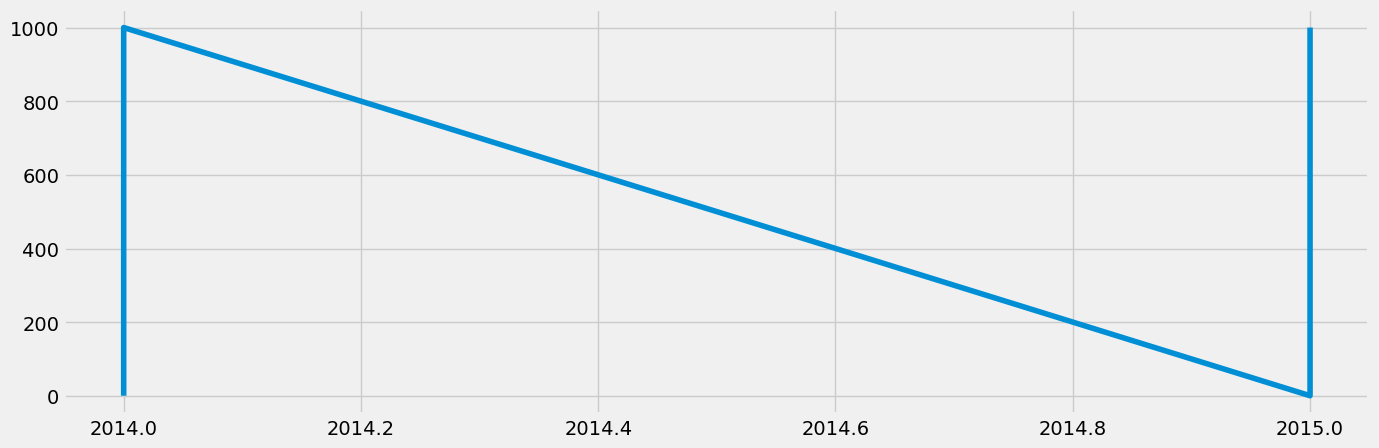

In [37]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. 
plt.plot(subset_df)

In [38]:
# Check for missing values 

subset_df.isnull().sum() 

world_rank    0
dtype: int64

In [39]:
# Check for duplicates

dups = subset_df.duplicated()
dups.sum()



1000

In [42]:
# Reset index so that you can use the "Date" column as a filter

data_2 = subset_df.reset_index()

In [43]:
data_2.head()

,year,world_rank
0,2014,1
1,2014,2
2,2014,3
3,2014,4
4,2014,5


In [58]:
# Set the "Date" column as the index

from datetime import datetime

data_2['datetime'] = pd.to_datetime(data_2['year']) # Create a datetime column from "Date.""
data_2 = data_2.set_index('datetime') # Set the datetime as the index of the dataframe.
data_2.drop(['year'], axis=1, inplace=True) # Drop the "Date" column.
data_2.head()

,world_rank
datetime,
1970-01-01 00:00:00.000002014,1
1970-01-01 00:00:00.000002014,2
1970-01-01 00:00:00.000002014,3
1970-01-01 00:00:00.000002014,4
1970-01-01 00:00:00.000002014,5


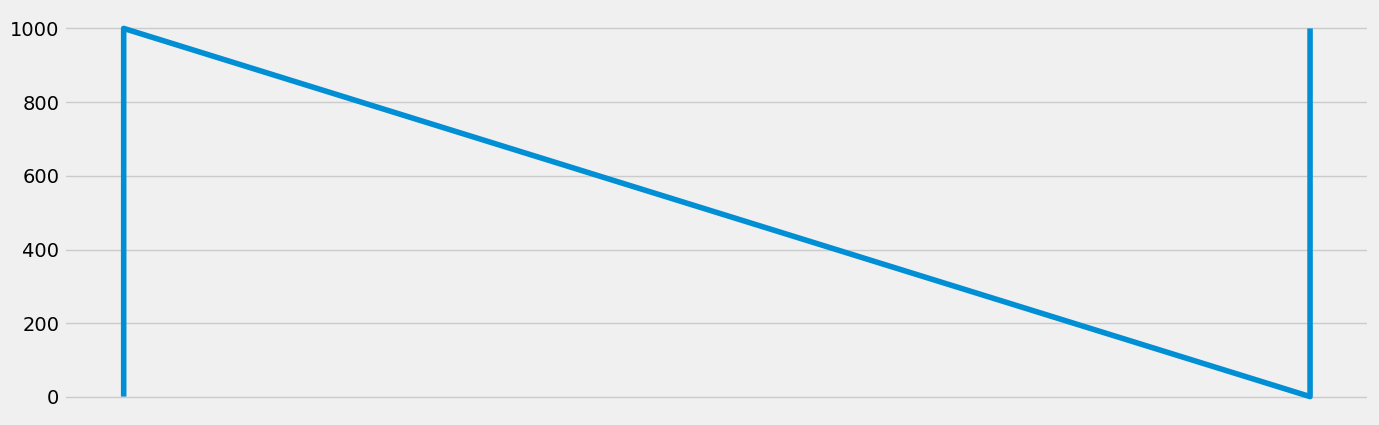

In [67]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_2)

In [60]:
# Check for missing values 

data_2.isnull().sum() 

world_rank    0
dtype: int64

In [61]:
# Check for duplicates

dups = data_2.duplicated()
dups.sum()


1000

In [68]:
# Extract the 'world_rank' column as a Series
ts = data_2['world_rank']


In [75]:
data_2.head()

,world_rank
datetime,
1970-01-01 00:00:00.000002014,1
1970-01-01 00:00:00.000002014,2
1970-01-01 00:00:00.000002014,3
1970-01-01 00:00:00.000002014,4
1970-01-01 00:00:00.000002014,5


In [76]:
ts.head()

datetime
1970-01-01 00:00:00.000002014    1
1970-01-01 00:00:00.000002014    2
1970-01-01 00:00:00.000002014    3
1970-01-01 00:00:00.000002014    4
1970-01-01 00:00:00.000002014    5
Name: world_rank, dtype: int64

### decomposition not necessary due to time series lack of seasonality 

### 4. Testing for stationarity

In [86]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_2['world_rank'])

Dickey-Fuller Stationarity test:
Test Statistic                   -1.732918
p-value                           0.414237
Number of Lags Used               0.000000
Number of Observations Used    1999.000000
Critical Value (1%)              -3.433625
Critical Value (5%)              -2.862987
Critical Value (10%)             -2.567540
dtype: float64


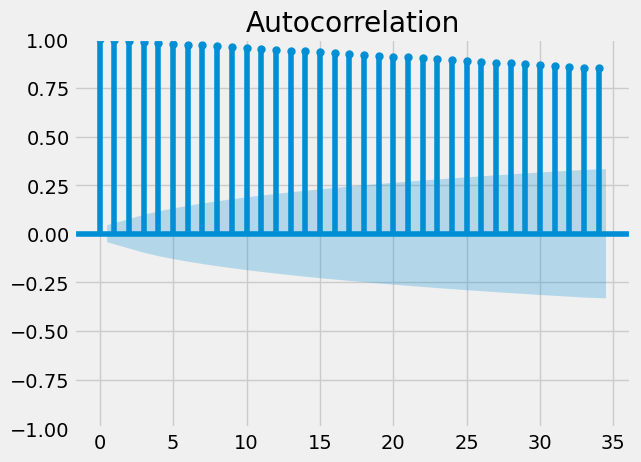

In [87]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_2)
plt.show()

## we can see here that the statistical properties of the data set remains constant over a period of time 

### 5. Stationarizing the Data

In [88]:
data_diff = data_2 - data_2.shift(1)

In [89]:
data_diff.dropna(inplace = True)

In [90]:
data_diff.head()

,world_rank
datetime,
1970-01-01 00:00:00.000002014,1.0
1970-01-01 00:00:00.000002014,1.0
1970-01-01 00:00:00.000002014,1.0
1970-01-01 00:00:00.000002014,1.0
1970-01-01 00:00:00.000002014,1.0


In [91]:
data_diff.columns

Index(['world_rank'], dtype='object')

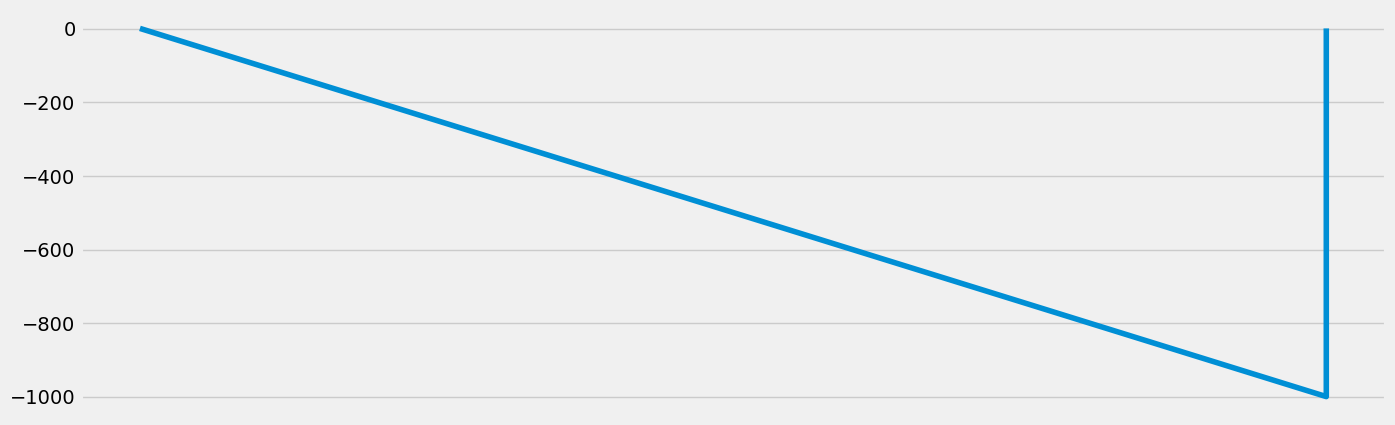

In [92]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

### stable mean and variance infered 

In [93]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -44.698993
p-value                           0.000000
Number of Lags Used               0.000000
Number of Observations Used    1998.000000
Critical Value (1%)              -3.433627
Critical Value (5%)              -2.862988
Critical Value (10%)             -2.567541
dtype: float64


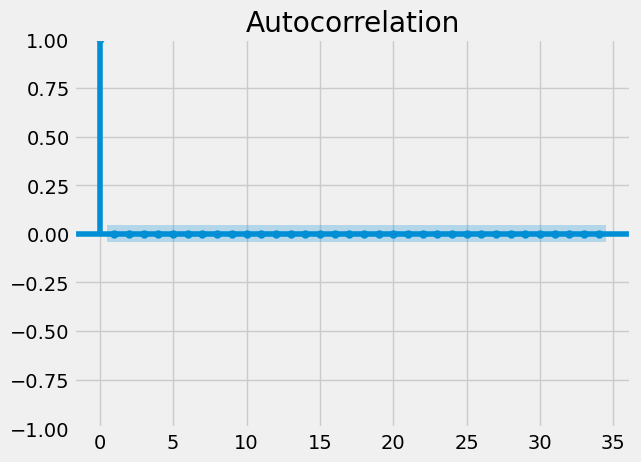

In [94]:
plot_acf(data_diff)
plt.show()

### spread or dispersion of data points appears relatively uniform across the entire time range. Variability in data points is consistent, indicating a stable data generating process.